# PLANTILLA PRESELECCIÓN DE VARIABLES

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

Cuando hay muchas variables, cientos de ellas.

Si vamos a usar algoritmos de la familia de los árboles no es necesario porque ellos mismos hacen preselección

Si vamos a usar una regresión es necesario hacerlo por temas de dimensionalidad.

Hacer primero los supervisados porque habremos reducido el nº de variables 

Si hemos transformado las variables estandarizandolas de varias formas pues luego correlacionarán muchisimo, o del todo, porque son las mismas variabels al fin y al cabo

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance


#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [11]:
ruta_proyecto = 'C:/Users/110927/Desktop/EstructuraDirectorio/03_MACHINE_LEARNING/CASOS/00_LeadScoring'

Nombres de los ficheros de datos.

In [12]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [13]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

In [15]:
df

,id,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,...,ambito_Select,ambito_Supply Chain Management,ambito_Travel and Tourism,ocupacion_OTROS,ocupacion_Student,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,compra
0,660737,0.00,0.000000,0.000,0.727273,0.444444,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,660728,0.10,0.296655,0.125,0.727273,0.444444,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,660727,0.04,0.674296,0.100,0.636364,1.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,660681,0.04,0.628521,0.050,0.727273,0.777778,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,660680,0.00,0.000000,0.000,0.909091,0.444444,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,579717,0.08,0.855634,0.100,0.636364,0.666667,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
4833,579622,0.26,0.620158,0.130,0.636364,0.666667,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4834,579615,0.10,0.092430,0.125,0.636364,1.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4835,579546,0.04,0.104754,0.100,0.636364,0.888889,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


## MÉTODOS SUPERVISADOS

### Preparar x e y

In [16]:
target = 'compra'
x = df.drop(columns = target).copy()
y =  df[target].copy()

In [ ]:
x=x.set_index('id')

### Mutual Information

#### Crear una función para mostrar el resultado

In [22]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

#### Calcular y revisar

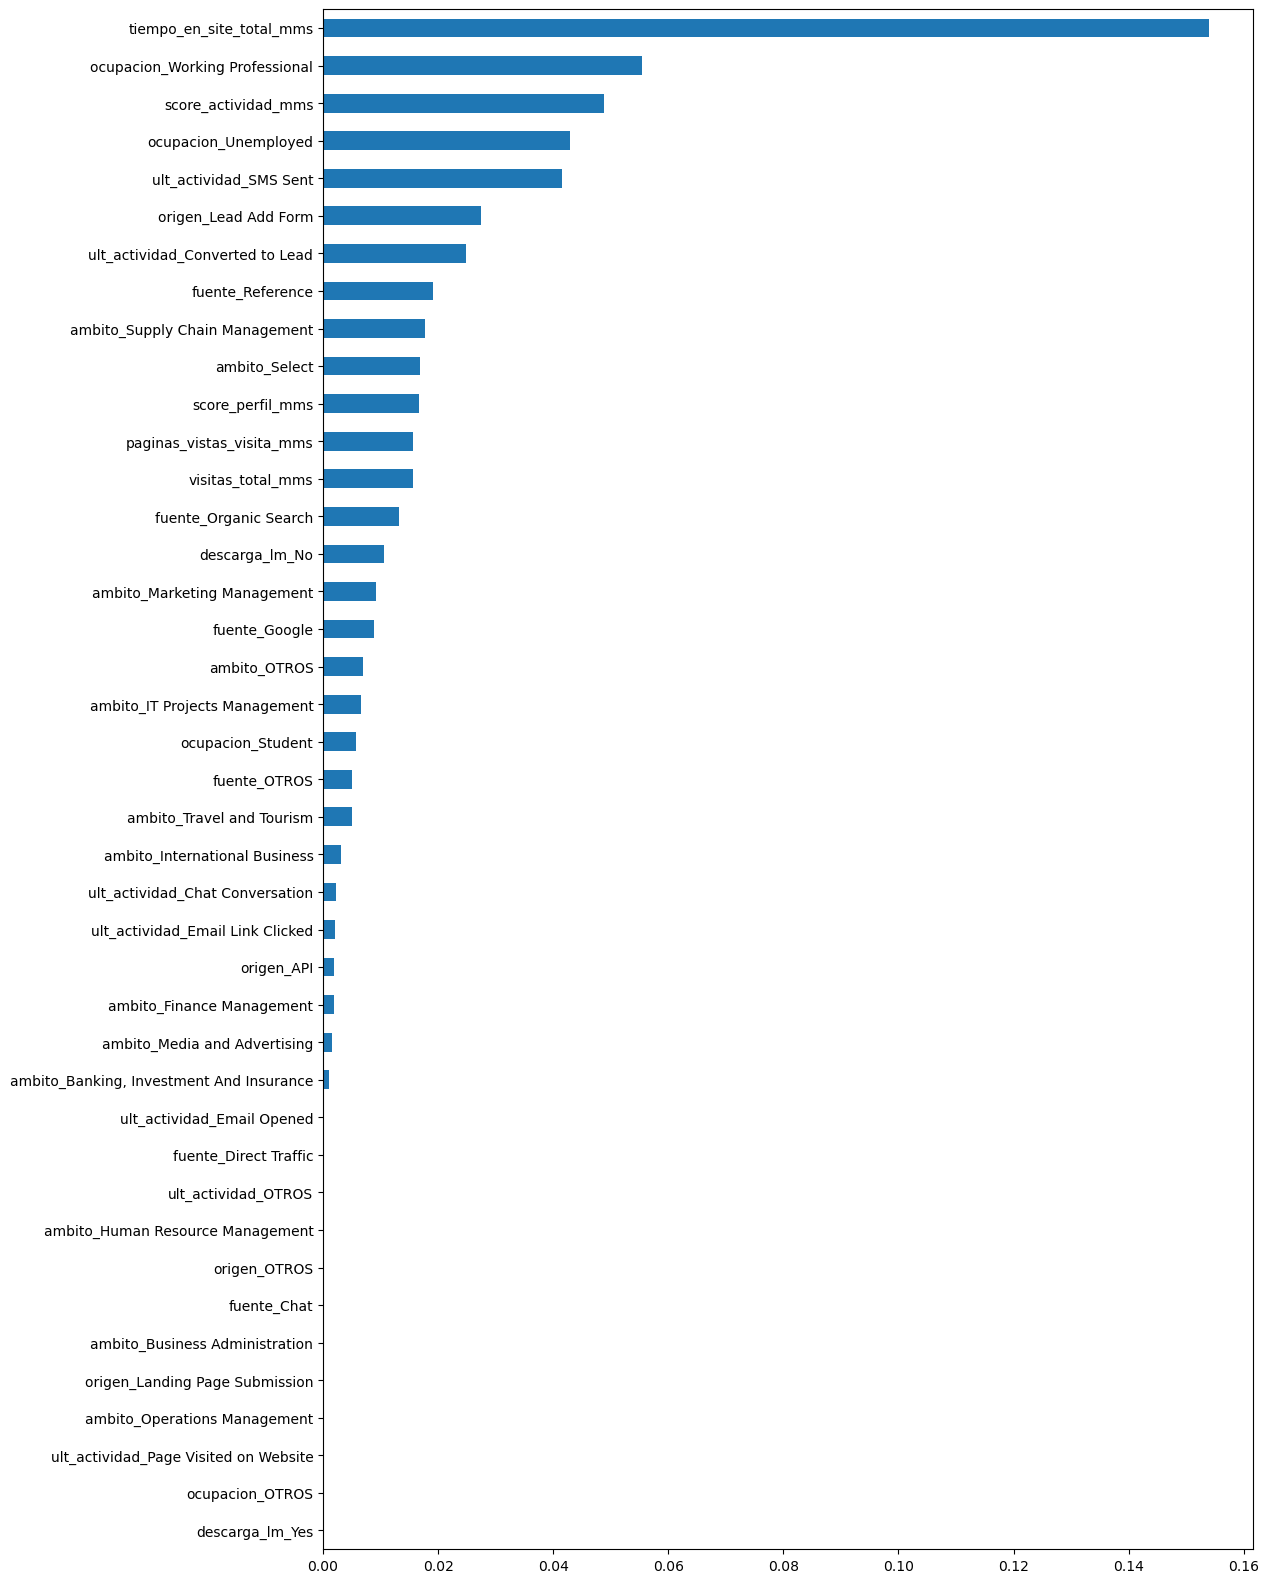

In [23]:
mutual_selector = mutual_info_classif(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [24]:
posicion_variable_limite = 16

##### Extraer los nombres de las que entran

In [25]:
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [26]:
x_mi = x[entran_mi].copy()

In [27]:
x_mi

,tiempo_en_site_total_mms,ocupacion_Working Professional,score_actividad_mms,ocupacion_Unemployed,ult_actividad_SMS Sent,origen_Lead Add Form,ult_actividad_Converted to Lead,fuente_Reference,ambito_Supply Chain Management,ambito_Select,score_perfil_mms,paginas_vistas_visita_mms,visitas_total_mms,fuente_Organic Search,descarga_lm_No,ambito_Marketing Management
id,,,,,,,,,,,,,,,,
660737,0.000000,0.0,0.727273,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.444444,0.000,0.00,0.0,1.0,0.0
660728,0.296655,0.0,0.727273,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.444444,0.125,0.10,1.0,1.0,0.0
660727,0.674296,0.0,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.100,0.04,0.0,0.0,0.0
660681,0.628521,0.0,0.727273,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.777778,0.050,0.04,0.0,1.0,0.0
660680,0.000000,0.0,0.909091,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.444444,0.000,0.00,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579717,0.855634,0.0,0.636364,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.100,0.08,0.0,0.0,0.0
579622,0.620158,0.0,0.636364,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.130,0.26,0.0,1.0,0.0
579615,0.092430,0.0,0.636364,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.125,0.10,0.0,1.0,0.0


### Recursive Feature Elimination

#### Instanciar

In [29]:
rfe = RFE(estimator = XGBClassifier(use_label_encoder=False, n_jobs = -1, eval_metric='auc'))

C:\Users\110927\AppData\Local\miniconda3\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


#### Entrenar

In [30]:
rfe.fit(x,y)

C:\Users\110927\AppData\Local\miniconda3\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\110927\AppData\Local\miniconda3\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\110927\AppData\Local\miniconda3\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\110927\AppData\Local\miniconda3\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\110927\AppData\Local\miniconda3\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `u

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric='auc',
                            feature_types=None, gamma=None, gpu_id=None,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=-1, num_parallel_tree=None, predictor=None,
                            random_state=None, ...))

##### Extraer los nombres de las que entran

In [31]:
entran_rfe = x.columns[rfe.support_]

#### Crear el dataframe con la selección

In [32]:
x_rfe = x[entran_rfe].copy()

### Permutation Importance

#### Crear una función para mostrar el resultado

In [33]:
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### Instanciar y entrenar

In [34]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBClassifier(use_label_encoder=False, n_jobs = -1, eval_metric='auc')

xgb.fit(x,y)

permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'roc_auc',
                                     n_repeats=5, n_jobs = -1)

C:\Users\110927\AppData\Local\miniconda3\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


#### Revisar la salida

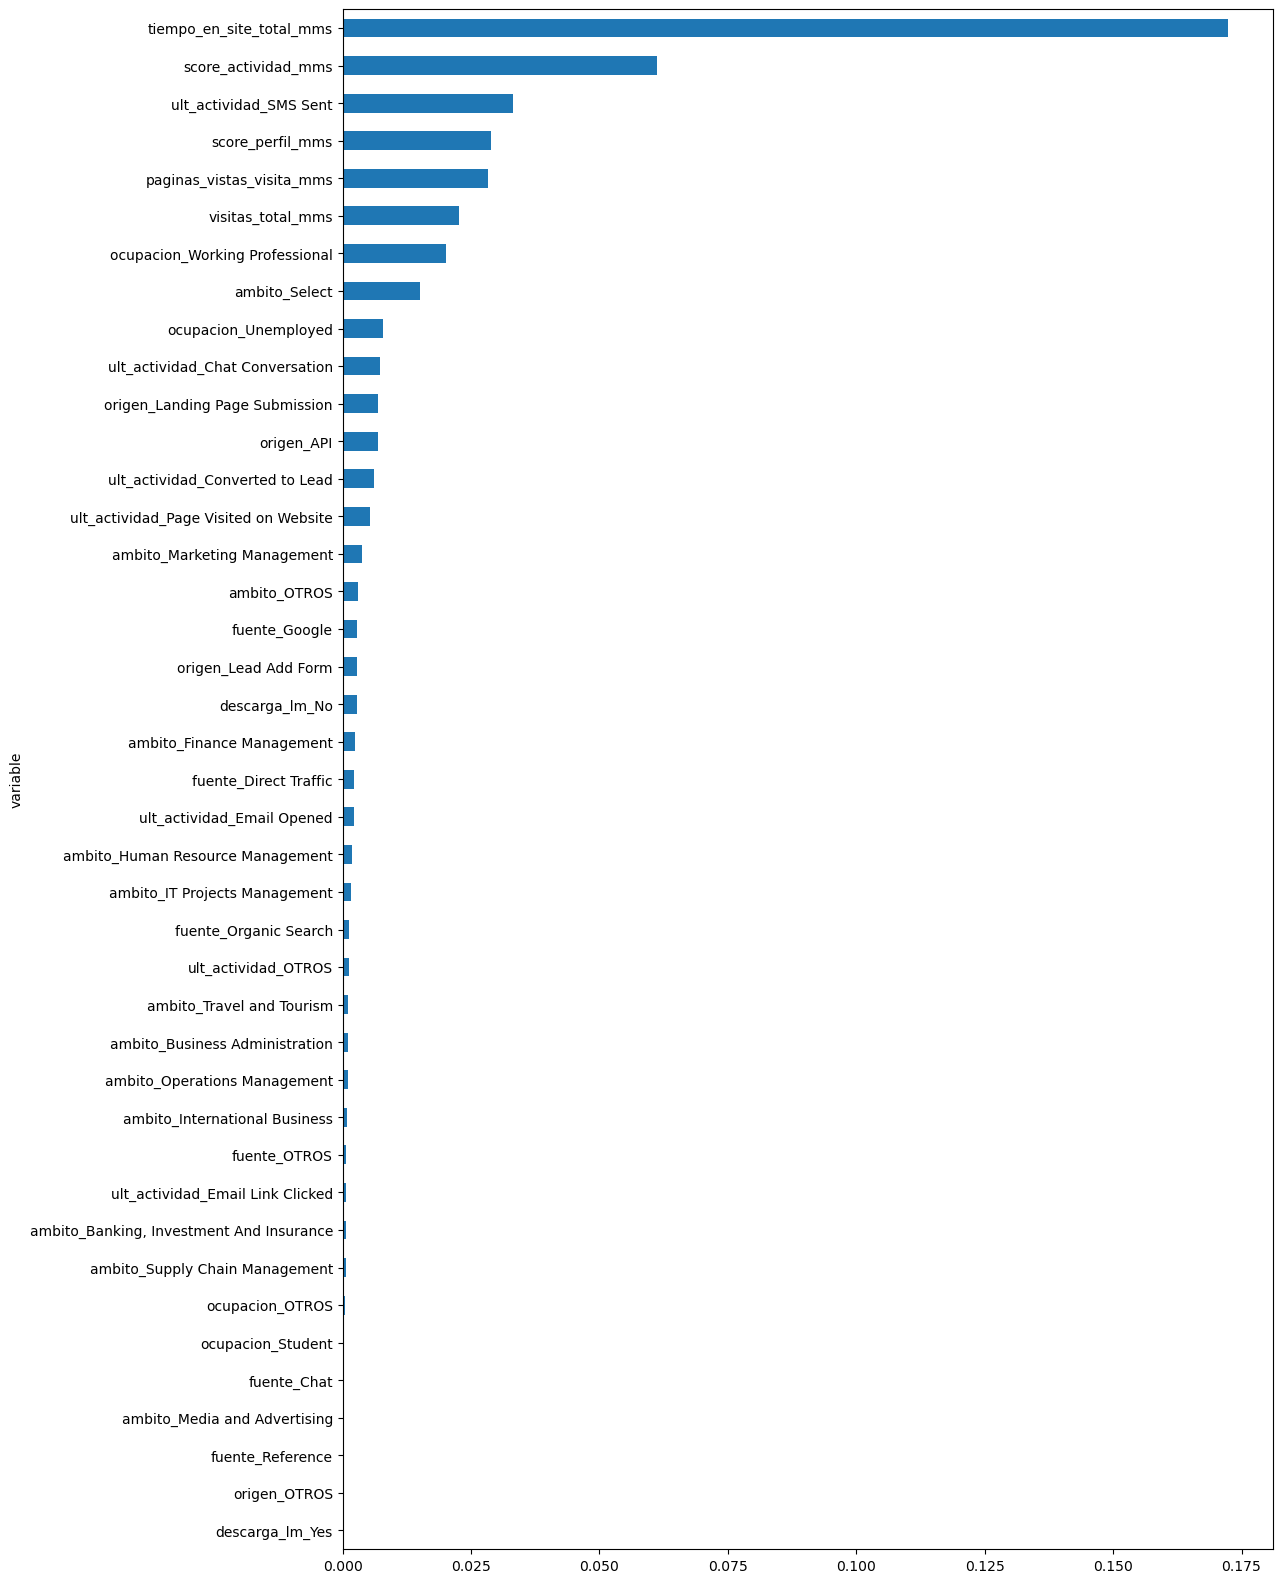

In [35]:
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,20));

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [36]:
posicion_variable_limite = 16

##### Extraer los nombres de las que entran

In [37]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [38]:
x_per = x[entran_per].copy()

In [44]:
x_per

,tiempo_en_site_total_mms,score_actividad_mms,ult_actividad_SMS Sent,score_perfil_mms,paginas_vistas_visita_mms,visitas_total_mms,ocupacion_Working Professional,ambito_Select,ocupacion_Unemployed,ult_actividad_Chat Conversation,origen_Landing Page Submission,origen_API,ult_actividad_Converted to Lead,ult_actividad_Page Visited on Website,ambito_Marketing Management,ambito_OTROS
id,,,,,,,,,,,,,,,,
660737,0.000000,0.727273,0.0,0.444444,0.000,0.00,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
660728,0.296655,0.727273,0.0,0.444444,0.125,0.10,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
660727,0.674296,0.636364,0.0,1.000000,0.100,0.04,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
660681,0.628521,0.727273,0.0,0.777778,0.050,0.04,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
660680,0.000000,0.909091,0.0,0.444444,0.000,0.00,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579717,0.855634,0.636364,1.0,0.666667,0.100,0.08,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
579622,0.620158,0.636364,1.0,0.666667,0.130,0.26,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
579615,0.092430,0.636364,1.0,1.000000,0.125,0.10,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## SELECCIONAR EL MÉTODO FINAL

Descomentar el método de preselección elegido y dejar comentados el resto.

In [39]:
#x_preseleccionado = x_mi
# x_preseleccionado = x_rfe
x_preseleccionado = x_per

## MÉTODOS NO SUPERVISADOS

### Correlación

#### Crear una función para mostrar el resultado

In [40]:
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    #Calcula la matriz de correlación
    c = df.corr().abs()
    #Lo pasa todo a filas
    c= c.unstack()
    #Pasa el índice a columnas y le pone nombres
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #A dataframe, filtra limites y ordena en descendiente
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    #Desduplica las correlaciones (o no si drop_dupli es False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

#### Calcular y revisar

##### Calcular

In [41]:
cor_finales = correlaciones_fuertes(x_preseleccionado)

##### Revisar agregado

In [42]:
cor_finales.var1.value_counts()

var1
origen_API                        3
ambito_Select                     2
ocupacion_Working Professional    1
visitas_total_mms                 1
score_perfil_mms                  1
paginas_vistas_visita_mms         1
Name: count, dtype: int64

##### Revisar detalle

In [43]:
cor_finales.head(50)

,var1,var2,corr
186,origen_API,origen_Landing Page Submission,0.879631
104,ocupacion_Working Professional,ocupacion_Unemployed,0.847915
183,origen_API,ambito_Select,0.708629
122,ambito_Select,origen_Landing Page Submission,0.689403
84,visitas_total_mms,paginas_vistas_visita_mms,0.560986
179,origen_API,score_perfil_mms,0.461045
115,ambito_Select,score_perfil_mms,0.405774
58,score_perfil_mms,origen_Landing Page Submission,0.395896
74,paginas_vistas_visita_mms,origen_Landing Page Submission,0.321712


#### Filtrar variables

Meter en una lista las que queramos descartar por alta correlacion y eliminarlas.

In [45]:
a_eliminar_corr = ['origen_API', 'origen_Landing Page Submission']

In [46]:
x_preseleccionado.drop(columns = a_eliminar_corr, inplace = True)

In [47]:
x_preseleccionado.columns.to_list()

['tiempo_en_site_total_mms',
 'score_actividad_mms',
 'ult_actividad_SMS Sent',
 'score_perfil_mms',
 'paginas_vistas_visita_mms',
 'visitas_total_mms',
 'ocupacion_Working Professional',
 'ambito_Select',
 'ocupacion_Unemployed',
 'ult_actividad_Chat Conversation',
 'ult_actividad_Converted to Lead',
 'ult_actividad_Page Visited on Website',
 'ambito_Marketing Management',
 'ambito_OTROS']

## GUARDAR DATASETS TRAS PRESELECCION DE VARIABLES

In [48]:
#Definir los nombres de los archivos
nombre_x_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'x_preseleccionado.pickle'
nombre_y_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'y_preseleccionado.pickle'

In [49]:
#Guardar los archivos
x_preseleccionado.to_pickle(nombre_x_preseleccionado)

y_preseleccionado = y.copy()
y_preseleccionado.to_pickle(nombre_y_preseleccionado)

In [50]:
#Guardar los nombres de las variables finales
nombre_variables_finales = ruta_proyecto + '/05_Resultados/' + 'variables_finales.pickle'

x_preseleccionado.iloc[0].to_pickle(nombre_variables_finales)